In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
%pwd

'/home/dev/Documents/DeepLearning'

In [4]:
train_dir = r'/home/dev/Documents/Datasets/cats_and_dogs_small/train/'

In [7]:
validation_dir = r'/home/dev/Documents/Datasets/cats_and_dogs_small/validation/'

In [8]:
test_dir = r'/home/dev/Documents/Datasets/cats_and_dogs_small/test/'

## Data Preprocessing

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
validation_generator = train_datagen.flow_from_directory(
validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [14]:
model = models.Sequential()

In [16]:
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))

In [18]:
model.add(layers.MaxPool2D((2,2)))

In [19]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [20]:
model.add(layers.MaxPool2D((2,2)))

In [21]:
model.add(layers.Conv2D(128,(3,3),activation='relu'))model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [22]:
model.add(layers.MaxPool2D((2,2)))

In [23]:
model.add(layers.Flatten())

In [26]:
model.add(layers.Dense(512, activation='relu'))

In [27]:
model.add(layers.Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [29]:
from tensorflow.keras import optimizers

In [30]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["acc"])

In [31]:
history = model.fit_generator(
train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=50)

/home/dev/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 57s 563ms/step - loss: 0.6934 - acc: 0.4928 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 50s 496ms/step - loss: 0.6933 - acc: 0.4943 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/20
100/100 [==============================] - 49s 490ms/step - loss: 0.6931 - acc: 0.5060 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 4/20
100/100 [==============================] - 48s 480ms/step - loss: 0.6907 - acc: 0.5197 - val_loss: 0.6871 - val_acc: 0.5320
Epoch 5/20
100/100 [==============================] - 46s 457ms/step - loss: 0.6836 - acc: 0.5976 - val_loss: 0.6772 - val_acc: 0.5950
Epoch 6/20
100/100 [==============================] - 46s 462ms/step - loss: 0.6717 - acc: 0.6474 - val_loss: 0.6747 - val_acc: 0.5630
Epoch 7/20
100/100 [==============================] - 46s 465ms/step - loss: 0.6501 - acc: 0.6972 - val_loss: 0.6577 - val_acc: 0.6380
Epoch 8/20
100/100 [==============================] - 4

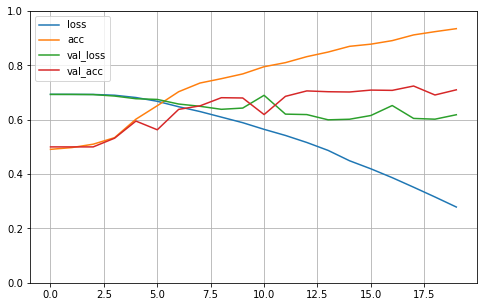

In [32]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
model.save("model.h5")

In [34]:
from tensorflow.keras import backend as K

In [35]:
K.clear_session()

In [36]:
del model

### Model with Data Argumentation

In [37]:
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
     horizontal_flip=True,
 )

In [38]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [76]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [77]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [78]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [79]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [80]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["acc"])

In [81]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=100,
    validation_data=validation_generator, 
    validation_steps=50,
verbose=1) 

Epoch 1/100
100/100 [==============================] - 47s 466ms/step - loss: 0.7311 - acc: 0.5148 - val_loss: 0.6772 - val_acc: 0.5360
Epoch 2/100
100/100 [==============================] - 51s 508ms/step - loss: 0.6768 - acc: 0.5603 - val_loss: 0.6402 - val_acc: 0.6260
Epoch 3/100
100/100 [==============================] - 54s 534ms/step - loss: 0.6365 - acc: 0.6422 - val_loss: 0.6211 - val_acc: 0.6520
Epoch 4/100
100/100 [==============================] - 53s 533ms/step - loss: 0.6296 - acc: 0.6383 - val_loss: 0.6295 - val_acc: 0.6360
Epoch 5/100
100/100 [==============================] - 54s 543ms/step - loss: 0.6307 - acc: 0.6248 - val_loss: 0.5917 - val_acc: 0.6670
Epoch 6/100
100/100 [==============================] - 56s 561ms/step - loss: 0.6181 - acc: 0.6466 - val_loss: 0.5795 - val_acc: 0.6790
Epoch 7/100
100/100 [==============================] - 61s 610ms/step - loss: 0.6005 - acc: 0.6673 - val_loss: 0.6013 - val_acc: 0.6710
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 100s 998ms/step - loss: 0.4615 - acc: 0.7860 - val_loss: 0.4826 - val_acc: 0.7680
Epoch 62/100
100/100 [==============================] - 100s 993ms/step - loss: 0.4805 - acc: 0.7613 - val_loss: 0.5237 - val_acc: 0.7460
Epoch 63/100
100/100 [==============================] - 100s 998ms/step - loss: 0.4368 - acc: 0.8006 - val_loss: 0.4785 - val_acc: 0.7590
Epoch 64/100
100/100 [==============================] - 100s 992ms/step - loss: 0.4342 - acc: 0.7947 - val_loss: 0.5082 - val_acc: 0.7580
Epoch 65/100
100/100 [==============================] - 99s 990ms/step - loss: 0.4679 - acc: 0.7760 - val_loss: 0.5054 - val_acc: 0.7710
Epoch 66/100
100/100 [==============================] - 100s 996ms/step - loss: 0.4432 - acc: 0.8029 - val_loss: 0.4575 - val_acc: 0.7830
Epoch 67/100
100/100 [==============================] - 100s 1s/step - loss: 0.4534 - acc: 0.7789 - val_loss: 0.4688 - val_acc: 0.7720
Epoch 68/100
100/100 [================

In [82]:
model.save("project_cnn.h5")

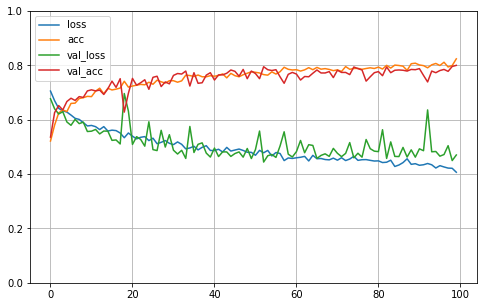

In [83]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [84]:
hist_df = pd.DataFrame(history.history)

In [85]:
hist_csv_file = 'history.csv'

In [86]:
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [87]:
test_generator = test_datagen.flow_from_directory(
test_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [88]:
model.evaluate_generator(test_generator, steps=50)

/home/dev/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.540942907333374, 0.7710000276565552]